In [1]:
#!pip install matplotlib==3.5.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'
save_path = dir_path

MOGP DFs

In [3]:
# LAST GEN
path_mogp_gr = dir_path + 'co3_globalRecall_evaluation_stats_last_gen.csv'
df_mogp_gr = pd.read_csv(path_mogp_gr)

df_mogp_gr

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0,0.823,25,0.085378,0.789532,0.856468


In [4]:
# 1st gen
path_mogp_gr_1st = dir_path + 'co3_globalRecall_evaluation_stats_gen_1.csv'
df_mogp_gr_1st = pd.read_csv(path_mogp_gr_1st)

df_mogp_gr_1st

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0,0.738476,25,0.113376,0.694032,0.782919


MOEIR DFs

In [5]:
# last gen
path_moeir_gr = dir_path + 'moeir_globalRecall_evaluation_stats_last_gen.csv'
df_moeir_gr = pd.read_csv(path_moeir_gr)

df_moeir_gr

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_prec,ci95_hi_prec
0,0,0.413475,25.0,0.13582,0.360233,0.466716


In [6]:
# last gen
path_moeir_p10_1st = dir_path + 'moeir_globalRecall_evaluation_stats_gen_1.csv'
df_moeir_gr_1st = pd.read_csv(path_moeir_p10_1st)

df_moeir_gr_1st

,Unnamed: 0,mean_gr,count_gr,std_gr,ci95_lo_prec,ci95_hi_prec
0,0,0.501027,25.0,0.172936,0.433237,0.568818


[(0.04444330278263241, 0.06779078511071754), (0.033468031820055685, 0.05324156068029269)]


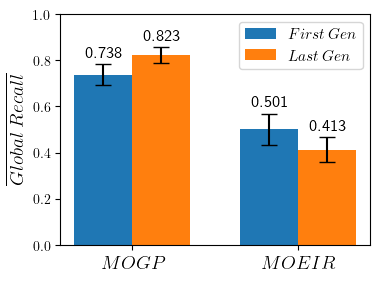

In [18]:
def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)



species = ("MOGP", "MOEIR" )

methods_means = {
    '$First  \: Gen$': (round(df_mogp_gr_1st['mean_gr'][0], 3), round(df_moeir_gr_1st['mean_gr'][0], 3)),
    '$Last \: Gen$': (round(df_mogp_gr['mean_gr'][0], 3), round(df_moeir_gr['mean_gr'][0], 3)),
}

std = [(IC_95(df_mogp_gr_1st['std_gr'][0],df_mogp_gr_1st['count_gr'][0]),
        IC_95(df_moeir_gr_1st['std_gr'][0], df_moeir_gr_1st['count_gr'][0])),        
       (IC_95(df_mogp_gr['std_gr'][0], df_mogp_gr['count_gr'][0]),
        IC_95(df_moeir_gr['std_gr'][0], df_moeir_gr['count_gr'][0]))]
print(std)
x = np.arange(len(species))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

for attribute, measurement in methods_means.items():
    
    offset = width * multiplier
    #axs.bar('mogp', t['mean_gr'], yerr=t['std_gr'], capsize=6)
    rects = ax.bar(x + offset, measurement, width, yerr=std[multiplier], label=attribute, capsize=6)
    ax.bar_label(rects, padding=3, fontsize=12)
    multiplier += 1


ax.set_ylabel(r'$$\overline{Global \: Recall}$$',fontsize=14)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(["$MOGP$", "$MOEIR$"],fontsize=14)


ax.legend(loc='upper right', ncol=1, fontsize=11)
ax.set_ylim(0, 1)
plt.savefig(dir_path+"mogp_vs_moeir_gr.svg")
plt.show()